# **Projet 5** : Optimisez la gestion des données d'une boutique avec R ou Python

**Mise en situation** : Aujourd’hui est un grand jour, vous commencez votre mission en tant que data analyst freelance chez BottleNeck, un marchand de vin très prestigieux. Votre manager sur cette mission (Laurent) vous accueille chaleureusement et vous propose de partager un petit café avec le reste de l’équipe du service Numérique. L’ambiance est bonne, et vous voilà déjà parfaitement intégré dans cette équipe détendue mais professionnelle.

**Compétences évaluées**
- Gérer les erreurs et les incohérences présentes sur des données stockées
- Classifier différents types de données
- Réaliser une analyse univariée pour interpréter des données

## import

In [818]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [819]:
erp = pd.read_csv('erp.csv',sep=';')
web = pd.read_csv('web.csv', sep =';')
liaison = pd.read_csv('liaison.csv',sep=';')

## Fichiers

In [820]:
def etude_fichier(df):
    # Etude du fichier 
    print("Forme du Dataframe :", df.shape)
    print()
    print("Le type est : \n", df.dtypes)
    print()
    print('Nombre de unique')
    print(df.nunique())
    print()
    print('le nombre de null est :\n',df.isnull().sum())

### erp

In [821]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,"24,2",0,outofstock
1,3849,1,"34,3",0,outofstock
2,3850,1,"20,8",0,outofstock
3,4032,1,"14,1",0,outofstock
4,4039,1,46,0,outofstock


In [822]:
etude_fichier(erp)

Forme du Dataframe : (825, 5)

Le type est : 
 product_id         int64
onsale_web         int64
price             object
stock_quantity     int64
stock_status      object
dtype: object

Nombre de unique
product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64

le nombre de null est :
 product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


In [823]:
# Modification du type de price et de product id
erp["price"] = erp["price"].str.replace(",",".").astype(float)
erp['product_id'] = erp['product_id'].astype('object')

In [824]:
erp.dtypes

product_id         object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

### liaison

In [825]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [826]:
etude_fichier(liaison)

Forme du Dataframe : (825, 2)

Le type est : 
 product_id     int64
id_web        object
dtype: object

Nombre de unique
product_id    825
id_web        734
dtype: int64

le nombre de null est :
 product_id     0
id_web        91
dtype: int64


In [827]:
# Modification type product_id
liaison['product_id'] = liaison['product_id'].astype('object')

In [828]:
liaison.dtypes

product_id    object
id_web        object
dtype: object

Il manque 91 correspondance entre les produits et l'identifiant SKu

In [829]:
# Modification du nom de la colonne
liaison = liaison.rename(columns={"id_web":"sku"})

In [830]:
liaison = liaison.dropna()

In [831]:
liaison.isnull().sum()

product_id    0
sku           0
dtype: int64

### web

In [832]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [833]:
etude_fichier(web)

Forme du Dataframe : (1513, 28)

Le type est : 
 sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                 object
post_mime_type            object
comment_count            float64
dtype: object

Nombre de un

Nous avons 85 clés 'sku' manquantes ce qui va nous géner dans le rapprochement avec la table de liaison

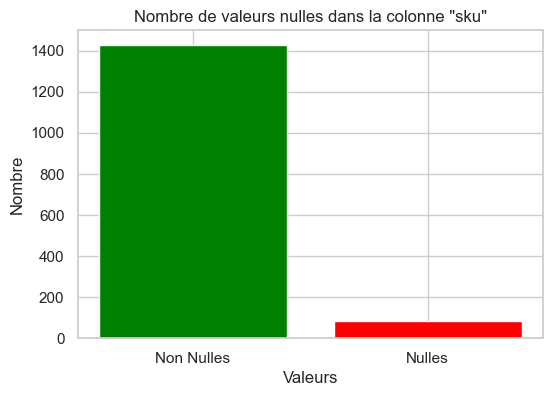

In [834]:
# Sélection de la colonne donnée
column_name = 'sku'
column_nulls = web[column_name].isnull()

# Calcul du nombre de valeurs nulles et non nulles
null_count = column_nulls.sum()
non_null_count = column_nulls.size - null_count

# Création du graphique à barres
plt.figure(figsize=(6, 4))
plt.bar(['Non Nulles', 'Nulles'], [non_null_count, null_count], color=['green', 'red'])

# Configuration des axes et du titre
plt.xlabel('Valeurs')
plt.ylabel('Nombre')
plt.title(f'Nombre de valeurs nulles dans la colonne "{column_name}"')

# Affichage du graphique
plt.show()

In [835]:
# Je commence par supprimer toutes les lignes ou 'sku' n'est pas renseigné
web = web.dropna(subset = ['sku'])
web.shape

(1428, 28)

In [836]:
# Je cherche si des doublons sont présents
print(web.duplicated(subset='sku').sum())
print()
web.duplicated(subset='sku')

714



0       False
1       False
2       False
3       False
4       False
        ...  
1508     True
1509     True
1510     True
1511     True
1512     True
Length: 1428, dtype: bool

In [837]:
# Effectivement on constate la présence de doublons, l'hypothèse est que tout les produits sont en doubles
web.loc[web.duplicated(subset = 'sku',keep='first'),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


J'ai 714 lignes qui sont des doublons, soit la moitié de mes 1428 lignes de départ
J'ai identifié une colonne dont le contenu diffère entre mes lignes produits et leurs doublons
Je vais donc vérifier le contenu de cette colonne, puis ne conserver que les lignes pour lesquelles une valeur est indiquée dans cette colonne

In [838]:
#recherche des valerus uniques dans la colonne
pd.unique(web['tax_status'])

array(['taxable', nan], dtype=object)

In [839]:
#etude de la colonne
web['tax_status']

0       taxable
1       taxable
2       taxable
3       taxable
4       taxable
         ...   
1508        NaN
1509        NaN
1510        NaN
1511        NaN
1512        NaN
Name: tax_status, Length: 1428, dtype: object

In [840]:
web = web.loc[web['tax_status'] == 'taxable']
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


J'obtiens bien un tableau avec 714 lignes qui correspondent à mes références d'articles

In [841]:
# Je vérifie que mon DF ne contient plus de doublons
web.loc[web.duplicated(subset='sku')== True]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


Il n'y a plus de doublons

## Jointures

### test de jointure entre erp, liaison et web

In [842]:
#Test de jointure 'outer' entre Erp, Liaison et Web
Test = pd.merge(erp, liaison, how="outer", on="product_id")
Test = pd.merge(Test, web, how="outer", on="sku", indicator=True) # nouvelle colonne pour savoir d'ou vient la ligne
# la liaison outer est pour récupérer toutes les lignes 

In [843]:
etude_fichier(Test)

Forme du Dataframe : (825, 34)

Le type est : 
 product_id                 object
onsale_web                  int64
price                     float64
stock_quantity              int64
stock_status               object
sku                        object
virtual                   float64
downloadable              float64
rating_count              float64
average_rating            float64
total_sales               float64
tax_status                 object
tax_class                 float64
post_author               float64
post_date                  object
post_date_gmt              object
post_content              float64
post_title                 object
post_excerpt               object
post_status                object
comment_status             object
ping_status                object
post_password             float64
post_name                  object
post_modified              object
post_modified_gmt          object
post_content_filtered     float64
post_parent               float64


J'ai 91 'SKU' null

In [844]:
#data temporaire pour web et liaison pour faire les manipulations
webt = web
liaisont = liaison

#drop les sku avec valeurs null dans web et liaison voir les études de fichier au dessus
webt = webt.dropna(subset=["sku"])
liaisont = liaisont.dropna(subset=["sku"])

#Affiche les lignes qui n'ont pas de correspondance entre Erp, Liaison et Web
Test.loc[Test["_merge"]=="left_only"]

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,5954,0,18.8,0,outofstock,15609,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
718,5955,0,27.3,0,outofstock,14377,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
720,5957,0,39.0,0,outofstock,13577,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
743,6100,0,12.9,0,outofstock,15529,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


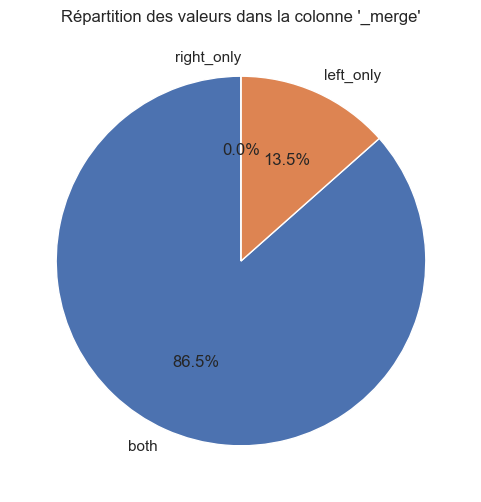

both          714
left_only     111
right_only      0
Name: _merge, dtype: int64


In [845]:
# Sélection de la colonne donnée
column_name = '_merge'
column_values = Test[column_name]

# Compter les occurrences des différentes valeurs dans la colonne
value_counts = column_values.value_counts(dropna=False)

# Création du graphique à secteurs
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)

# Configuration du titre
plt.title(f"Répartition des valeurs dans la colonne '{column_name}'")

# Affichage du graphique
plt.show()
print(value_counts)

Nous allons seulmeent agrder les lignes qui ont des correspondances 'both'

In [846]:
# Filtrer le DataFrame pour ne garder que les lignes correspondantes (both)
All = Test[Test["_merge"] == "both"]

# Réinitialiser les index du DataFrame après le filtrage
All.reset_index(drop=True, inplace=True)

In [847]:
etude_fichier(All)

Forme du Dataframe : (714, 34)

Le type est : 
 product_id                 object
onsale_web                  int64
price                     float64
stock_quantity              int64
stock_status               object
sku                        object
virtual                   float64
downloadable              float64
rating_count              float64
average_rating            float64
total_sales               float64
tax_status                 object
tax_class                 float64
post_author               float64
post_date                  object
post_date_gmt              object
post_content              float64
post_title                 object
post_excerpt               object
post_status                object
comment_status             object
ping_status                object
post_password             float64
post_name                  object
post_modified              object
post_modified_gmt          object
post_content_filtered     float64
post_parent               float64


On obtient un df avec des correspondance entre tout les ID. Nous n'avons aucun product_id ou sku null, nous pouvons donc commencer à étudier le CA avec les données significatives.

In [848]:
#Test de jointure 'inner' entre Erp, Liaison et Web
Test_2 = pd.merge(erp, liaison ,how='inner', on='product_id')
Test_2 = pd.merge(Test_2, web, on='sku', how='inner')
# la liaison inner est pour récupérer seulement les lignes qui ont des correspodnaces 

In [849]:
etude_fichier(Test_2)

Forme du Dataframe : (714, 33)

Le type est : 
 product_id                object
onsale_web                 int64
price                    float64
stock_quantity             int64
stock_status              object
sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      ob

## Etude CA

### création colonne ca

In [850]:
#Ajoute la colonne CA correspondant au Chiffre d'Affaire par produit
All["CA"]=All["total_sales"]*All["price"]

C:\Users\antoi\AppData\Local\Temp\ipykernel_28552\3656808068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All["CA"]=All["total_sales"]*All["price"]


In [851]:
All.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge,CA
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0


In [852]:
#Calcule le chiffre d'affaire total
Total_CA = All["CA"].sum()
print("Le chiffre d'affaires total est de",Total_CA,"€")

Le chiffre d'affaires total est de 70568.6 €


### Analyse CA

#### Top produits

In [853]:
#Regroupement du DataFrame par nom de produit et calcul de la somme du CA
product_ca = round(All.groupby('post_title')['CA'].sum().sort_values(ascending=False))
    
# Sélection des n produits les plus importants
top_products = product_ca.head(15)
top_products

post_title
Champagne Gosset Grand Blanc de Blancs                       4704.0
Champagne Gosset Grand Rosé                                  4263.0
Cognac Frapin VIP XO                                         2288.0
Champagne Gosset Grand Millésime 2006                        1590.0
Champagne Gosset Grande Réserve                              1560.0
Champagne Egly-Ouriet Grand Cru Blanc de Noirs               1392.0
Champagne Egly-Ouriet Grand Cru Millésimé 2008               1125.0
Elian Daros Côtes du Marmandais Clos Baquey 2015             1044.0
Domaine Giudicelli Patrimonio Blanc 2019                     1033.0
Gilles Robin Crozes-Hermitage Rouge Papillon 2019            1029.0
Clos du Mont-Olivet Châteauneuf-du-Pape 2012                 1019.0
Marc Colin Et Fils Chassagne-Montrachet Blanc Margot 2017    1010.0
Jacqueson Rully Blanc 1er Cru La Pucelle 2018                1004.0
Albert Mann Pinot Noir Grand H 2017                           958.0
Domaine Giudicelli Patrimonio Rouge 2

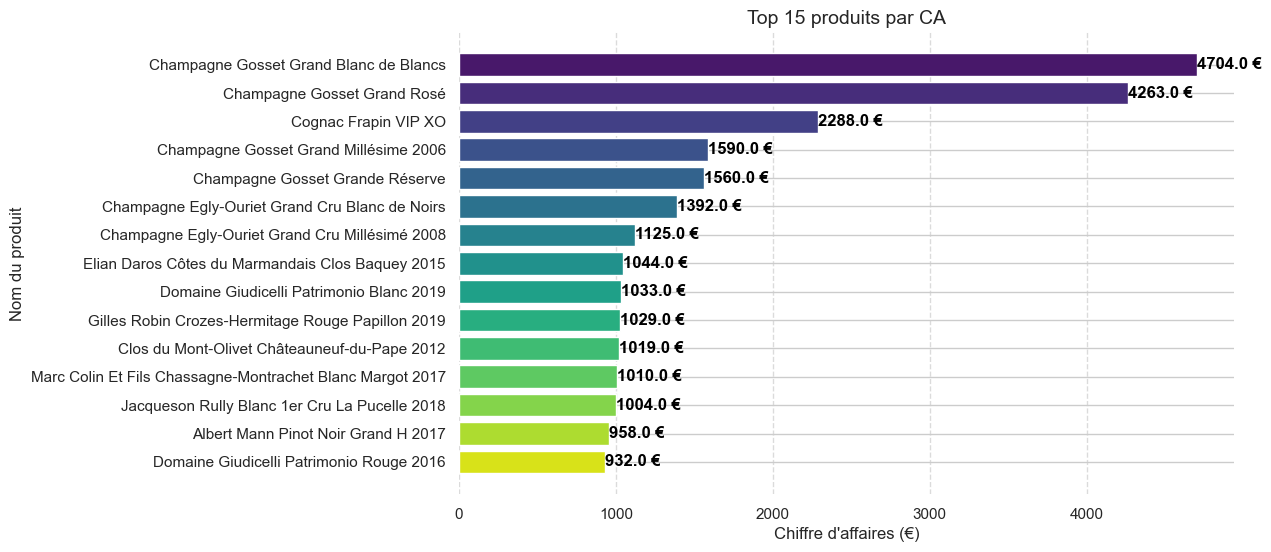

In [854]:
# Définir la taille du graphique
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Personnaliser les couleurs des barres
colors = sns.color_palette('viridis', len(top_products))

# Création du graphique à barres horizontales avec des couleurs personnalisées
bars = plt.barh(top_products.index, top_products.values, color=colors)

# Ajouter des étiquettes pour chaque barre avec le symbole "€"
for bar, value in zip(bars, top_products.values):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{value} €', color='black', fontweight='bold', ha='left', va='center')

# Ajouter un titre et des étiquettes d'axe
plt.title(f'Top 15 produits par CA', fontsize=14)
plt.xlabel('Chiffre d\'affaires (€)', fontsize=12)
plt.ylabel('Nom du produit', fontsize=12)

# Inverser l'axe y pour afficher les noms de haut en bas
plt.gca().invert_yaxis()

# Supprimer les bordures du graphique
plt.box(False)

# Afficher la grille horizontale pour faciliter la lecture
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()

#### Flop produits

In [855]:
# Filtrer les produits avec un chiffre d'affaires nul (CA = 0)
produits_avec_zero_ca = All[All["CA"] == 0]
produits_avec_zero_ca[['post_name' , 'CA']]

,post_name,CA
1,pierre-jean-villa-saint-joseph-tilde-2017,0.0
2,pierre-jean-villa-croze-hermitage-accroche-coe...,0.0
4,pierre-jean-villa-cote-rotie-carmina-2017,0.0
5,pierre-jean-villa-saint-joseph-saut-ange-2018,0.0
6,pierre-gaillard-condrieu-2018,0.0
...,...,...
706,jean-faure-saint-emilion-grand-cru-2015,0.0
710,camin-larredya-jurancon-sec-la-virada-2018,0.0
711,jamet-cote-rotie-fructus-voluptas-2018,0.0
712,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,0.0


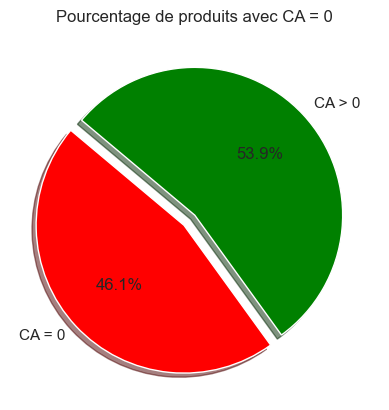

Nous avons 329 produits qui ont réalsié 0 de ca.


In [856]:
# Calculer le nombre de produits avec un CA de 0 et le nombre total de produits
nombre_produits_zero_ca = len(produits_avec_zero_ca)
nombre_total_produits = len(All)

# Créer les données pour le graphique en camembert
labels = ['CA = 0', 'CA > 0']
sizes = [nombre_produits_zero_ca, nombre_total_produits - nombre_produits_zero_ca]
colors = ['red', 'green']
explode = (0.1, 0)  # Mettre en évidence la tranche pour CA = 0

# Créer le graphique en camembert
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pourcentage de produits avec CA = 0')
plt.show()
print('Nous avons', len(produits_avec_zero_ca), 'produits qui ont réalsié 0 de ca.')

#### Nombre de ventes en focntion du prix

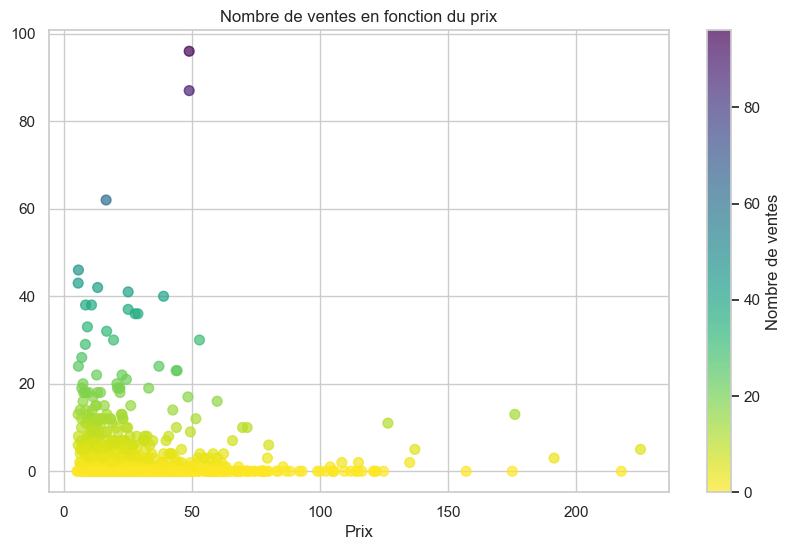

In [857]:
# Création d'une palette de couleurs inversée
colors = plt.cm.get_cmap('viridis_r')

# Création du nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(All['price'], All['total_sales'], c=All['total_sales'], cmap=colors, alpha=0.7, s=50)

# Configuration des axes et du titre
plt.xlabel('Prix')
plt.title('Nombre de ventes en fonction du prix')

# Ajout d'une barre de couleur
cbar = plt.colorbar()
cbar.set_label('Nombre de ventes')

# Affichage du graphique
plt.show()

In [858]:
# Myenne des prix et des ventes
moyenne= round(All[['price', 'total_sales']].mean())
# variance des prix et des ventes
variance = round(All[['price', 'total_sales']].var())
# ecart type des prix et des ventes
ecart_type = round(All[['price', 'total_sales']].std())

In [859]:
print('Moyenne : ')
print(moyenne)
print()
print('variance : ')
print(variance)
print()
print('ecart type :')
print(ecart_type)

Moyenne : 
price          32.0
total_sales     4.0
dtype: float64

variance : 
price          773.0
total_sales     73.0
dtype: float64

ecart type :
price          28.0
total_sales     9.0
dtype: float64


Prix
- Moyenne: Le prix moyen d'un produit est de 32,49€.
- Variance et Écart-Type: Avec une variance de 773,43 et un écart-type de 27,81, ces valeurs indiquent que les prix varient considérablement autour de la moyenne. Cela peut refléter une large gamme de produits offerts, allant des options économiques aux options premium. Plus l'écart-type est élevé, plus la dispersion est grande.

Ventes Totales

- Moyenne: Le nombre moyen de ventes pour un produit dans votre ensemble de données est d'environ 4,01.
- Variance et Écart-Type: Avec une variance de 72,56 et un écart-type de 8,52, ces valeurs suggèrent que les niveaux de ventes varient moins par rapport à la moyenne. Cela peut indiquer que la demande est relativement stable et uniforme entre différents produits.

Conclusion

Les prix des produits présentent une grande variabilité, ce qui pourrait suggérer  la présence de différents segments de marché (par exemple, produits de base vs produits de luxe).
Les ventes totales présentent une variabilité plus faible, ce qui peut refléter une demande plus constante et prévisible entre les produits.

                price  total_sales
price        1.000000    -0.133353
total_sales -0.133353     1.000000


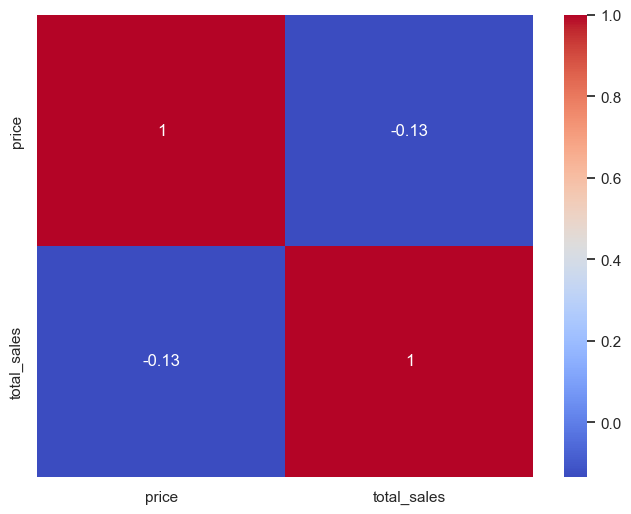

In [860]:
# Corrélation entre les prix et les ventes
correlation_matrice = All[['price', 'total_sales']].corr()
print(correlation_matrice)

# Creation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrice, annot=True, cmap='coolwarm')
plt.show()

Cette valeur indique une faible corrélation négative entre le prix et les ventes totales.

Une corrélation négative signifie que lorsque l'une des variables augmente, l'autre a tendance à diminuer, et vice versa.
La faiblesse de cette corrélation (-0,133353 est proche de 0) suggère que la relation n'est pas très forte. Autrement dit, la variation du prix n'explique pas de manière significative la variation des ventes totales dans vos données.

La faible corrélation négative peut indiquer que des produits plus chers ont tendance à se vendre légèrement moins, et que des produits moins chers ont tendance à se vendre légèrement plus. Cependant, la faiblesse de cette corrélation suggère que d'autres facteurs (tels que la qualité, la marque, la saisonnalité, etc.) peuvent avoir une influence plus importante sur les ventes totales que le prix seul.
Il est important de noter qu'une corrélation ne démontre pas de causalité.

## Etude outliers

### Distribution des produits par prix

In [861]:
# Tri de colonnes 
All = All[['product_id','price','total_sales',"CA", "post_title"]].sort_values('price')

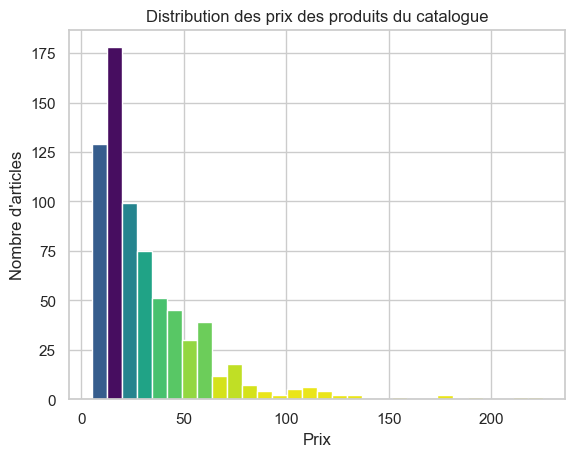

In [862]:
# Distribution des poduits par prix

# Créer une palette de couleurs en utilisant Seaborn
n_bins = 30 # définiton de 30 intervalles
colors = sns.color_palette("viridis_r", n_bins)

# Calculer les valeurs de l'histogramme
n, bins, patches = plt.hist(All['price'], bins=n_bins)

# Colorier chaque barre en fonction de sa hauteur (nombre d'articles)
for value, patch in zip(n, patches):
    color_index = int(value / max(n) * (n_bins - 1))
    patch.set_facecolor(colors[color_index])

plt.title('Distribution des prix des produits du catalogue')
plt.xlabel('Prix')
plt.ylabel("Nombre d'articles")
plt.show()

In [863]:
#coefficient de variation
coef = round(All['CA'].std() / All['CA'].mean())
print('Ce résultat indique que l\'écart-type de la colonne "CA" est d\'environ', coef, 'fois la moyenne.')

Ce résultat indique que l'écart-type de la colonne "CA" est d'environ 3 fois la moyenne.


Cela indique une variabilité significative dans les données de chiffre d'affaires.
Si la moyenne représente un "niveau typique" de chiffre d'affaires, alors un grand nombre de valeurs sont considérablement différentes de ce niveau typique. Cela peut signifier que les données sont assez dispersées.

Des valeurs extrêmes ou des outliers peuvent également influencer à la fois la moyenne et l'écart-type, ce qui peut expliquer un coéfficient de variation élevé.

### Etude des quartiles

Le premier quartile (Q1) est la valeur médiane de la première moitié des données, le deuxième quartile (Q2) est la médiane de l'ensemble des données, et le troisième quartile (Q3) est la valeur médiane de la seconde moitié des données.
Les quartiles donnent une vue plus robuste de la distribution, car ils ne sont pas influencés par les valeurs extrêmes.

In [864]:
# Calcul des quartiles
q1 = All['price'].quantile(0.25).round(1)
q2 = All['price'].quantile(0.5).round(1)
q3 = All['price'].quantile(0.75).round(1)
print(q1)
print(q2)
print(q3)

14.1
23.6
42.2


In [865]:
# Calcul de l'écart interquartiles
iqr = q3 - q1
print(iqr)

28.1


In [866]:
# Définition des bornes supérieure et inférieure pour les outliers
lower_bound = round(q1 - 1.5 * iqr)
upper_bound = round(q3 + 1.5 * iqr)
print('lower bound :')
print(lower_bound)
print('upper bound :')
print(upper_bound)

lower bound :
-28
upper bound :
84


In [867]:
# Identification des outliers
outliers = All[(All['price'] < lower_bound) | (All['price'] > upper_bound)]

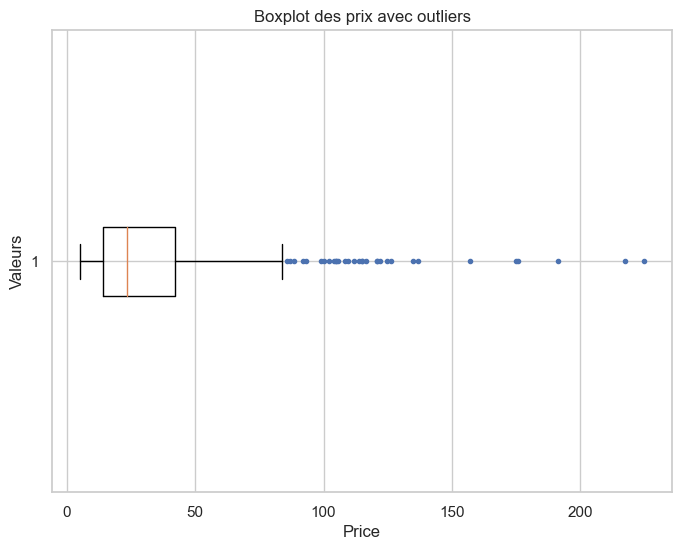

In [868]:
# Création du boxplot avec outliers
plt.figure(figsize=(8, 6))
plt.boxplot(All['price'], whis=1.5, sym='b.', vert=False)
plt.title("Boxplot des prix avec outliers")
plt.xlabel("Price")
plt.ylabel("Valeurs")
plt.show()

In [869]:
outliers.head()

,product_id,price,total_sales,CA,post_title
205,4359,85.6,1.0,85.6,Champagne Larmandier-Bernier Grand Cru Les Che...
438,5026,86.8,0.0,0.0,Champagne Agrapart &amp; Fils Minéral Extra Br...
65,4132,88.4,0.0,0.0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...
502,5565,92.0,0.0,0.0,Tempier Bandol Cabassaou 2017
602,5916,93.0,0.0,0.0,Wemyss Malts Single Cask Scotch Whisky Chocola...


In [870]:
etude_fichier(outliers)

Forme du Dataframe : (32, 5)

Le type est : 
 product_id      object
price          float64
total_sales    float64
CA             float64
post_title      object
dtype: object

Nombre de unique
product_id     32
price          29
total_sales     7
CA             11
post_title     32
dtype: int64

le nombre de null est :
 product_id     0
price          0
total_sales    0
CA             0
post_title     0
dtype: int64


In [871]:
# lsites de tout les produits considérés comme outliers
outliers

,product_id,price,total_sales,CA,post_title
205,4359,85.6,1.0,85.6,Champagne Larmandier-Bernier Grand Cru Les Che...
438,5026,86.8,0.0,0.0,Champagne Agrapart &amp; Fils Minéral Extra Br...
65,4132,88.4,0.0,0.0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...
502,5565,92.0,0.0,0.0,Tempier Bandol Cabassaou 2017
602,5916,93.0,0.0,0.0,Wemyss Malts Single Cask Scotch Whisky Chocola...
655,6214,99.0,0.0,0.0,Domaine des Comtes Lafon Volnay 1er Cru Champa...
63,4115,100.0,0.0,0.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...
380,4903,102.3,0.0,0.0,Domaine Des Croix Corton Grand Cru Les Grèves ...
222,4407,104.0,1.0,104.0,Cognac Frapin Cigar Blend
432,5008,105.0,0.0,0.0,Domaine des Comtes Lafon Volnay 1er Cru Santen...


On peut se rendre compte que la majorité des ventes sont sur des produits qui sont à moins de 50 euros, les outliers que nous trouvons sont des bouteilles avec des prix élevés. Dans le cadre d'une boutique de vins ces résultats ne sont pas choquants, il y a beaucoup de bouteilles qui peuvent se vendre à des prix élevés nottament les grands crus. La différenciation entre les produits de base et les produits haut de gamme peuvent expliquer les outliers ques nous avons détecté.

In [872]:
All.head()

,product_id,price,total_sales,CA,post_title
645,6129,5.2,0.0,0.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...
98,4173,5.7,13.0,74.1,Maurel Pays d'Oc Chenin-Colombard 2019
560,5777,5.7,0.0,0.0,Maurel Pays d'Oc Cabernet-Sauvignon 2017
97,4172,5.7,43.0,245.1,Maurel Pays d'Oc Chardonnay 2019
99,4174,5.7,6.0,34.2,Maurel Cabardès Tradition 2017


### Etude du Z-score

Le Z-score est une mesure statistique qui décrit la position d'une valeur individuelle par rapport à la moyenne de l'ensemble des données, exprimée en unités d'écart-type.

Z-socre = (x-μ)/σ

μ est la moyenne de l'ensemble des données et σ est l'écart-type de l'ensemble des données.

Z-score = 0 : La valeur est égale à la moyenne de l'ensemble des données.
Z-score > 0 : La valeur est supérieure à la moyenne.
Z-score < 0 : La valeur est inférieure à la moyenne.

In [873]:
All['price_zscore'] = stats.zscore(All['price'])

In [874]:
All.head()

,product_id,price,total_sales,CA,post_title,price_zscore
645,6129,5.2,0.0,0.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,-0.982084
98,4173,5.7,13.0,74.1,Maurel Pays d'Oc Chenin-Colombard 2019,-0.964093
560,5777,5.7,0.0,0.0,Maurel Pays d'Oc Cabernet-Sauvignon 2017,-0.964093
97,4172,5.7,43.0,245.1,Maurel Pays d'Oc Chardonnay 2019,-0.964093
99,4174,5.7,6.0,34.2,Maurel Cabardès Tradition 2017,-0.964093


In [877]:
# Seuil pour identifier les outliers (par exemple, Z-score absolu > 2)
threshold = 2

# Identifier les outliers en utilisant le Z-score
outliers = np.abs(All['price_zscore']) > threshold

# Trouver le nombre et le pourcentage d'outliers
number_of_outliers = outliers.sum()
percentage_of_outliers = (number_of_outliers / All.shape[0]) * 100

# Trouver le nombre et le pourcentage de valeurs non aberrantes
number_of_non_outliers = All.shape[0] - number_of_outliers
percentage_of_non_outliers = 100 - percentage_of_outliers

print(f"Pourcentage de prix en dessous du seuil d'outliers (basé sur le Z-score) : {percentage_of_non_outliers:.2f}%")
print(f"Pourcentage de prix considérés comme outliers (basé sur le Z-score) : {percentage_of_outliers:.2f}%")

Pourcentage de prix en dessous du seuil d'outliers (basé sur le Z-score) : 95.80%
Pourcentage de prix considérés comme outliers (basé sur le Z-score) : 4.20%


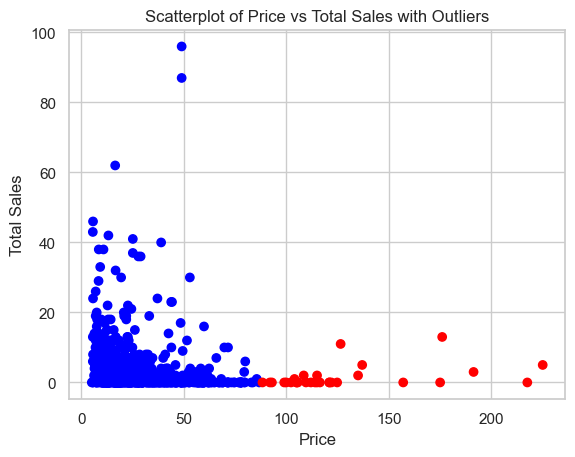

In [878]:
# Créer un scatterplot de la colonne "price" par rapport à une autre variable (par exemple, "total_sales")
plt.scatter(All['price'], All['total_sales'], c=colors)
plt.xlabel('Price')
plt.ylabel('Total Sales')
plt.title('Scatterplot of Price vs Total Sales with Outliers')

# Définir les couleurs en fonction des outliers
colors = np.where(outliers, 'red', 'blue')
plt.show()